*Replace this text with your own name and a brief description of what this notebook does.*

## Homework 12-2

We will use the dataset from Homework 3-2, which contains information about all film permits issued by the city since Jan. 1, 2023: [https://data.cityofnewyork.us/City-Government/Film-Permits/tg4x-b46p](https://data.cityofnewyork.us/City-Government/Film-Permits/tg4x-b46p)

Write a piece of code that plots a combined bar chart of the boroughs counts for permits for feature films and episodic televiion series. 

In other words, the bar chart should simultaneously show the number feature film permits (`SubCategoryName` column is `Feature`) issued for each borough and the other bar chart should show the number of episodic television series permits (`SubCategoryName` column is `Episodic series`) issued for each borough. 

Your plot should have a title, x and y axis labels, and a legend.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
permits = pd.read_csv("../../data/Film_Permits.csv")
permits

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s)
0,722988,Shooting Permit,06/08/2023 04:00:00 AM,06/08/2023 11:00:00 AM,06/07/2023 10:08:30 AM,"Mayor's Office of Film, Theatre & Broadcasting",WEST 48 STREET between 6 AVENUE and 7 AVENUE,Manhattan,5,18,Television,News,United States of America,"10036, 10105"
1,722865,Theater Load in and Load Outs,06/08/2023 12:01:00 AM,06/11/2023 11:59:00 PM,06/06/2023 04:53:37 PM,"Mayor's Office of Film, Theatre & Broadcasting",WEST 31 STREET between 7 AVENUE and 8 AVENUE...,Manhattan,"4, 5",14,Theater,Theater,United States of America,"10001, 10121"
2,722224,Shooting Permit,06/08/2023 06:00:00 AM,06/08/2023 09:00:00 PM,06/05/2023 10:28:58 AM,"Mayor's Office of Film, Theatre & Broadcasting",STRATFORD ROAD between BEVERLEY ROAD and SLOCU...,Brooklyn,"14, 2","6, 70",Still Photography,Not Applicable,United States of America,"10014, 11218"
3,722199,Shooting Permit,06/07/2023 09:00:00 AM,06/07/2023 11:00:00 PM,06/05/2023 09:37:45 AM,"Mayor's Office of Film, Theatre & Broadcasting",COLGATE AVENUE between STORY AVENUE and LAFAYE...,Bronx,9,43,Television,Episodic series,United States of America,10473
4,722107,Shooting Permit,06/08/2023 07:00:00 AM,06/08/2023 11:00:00 PM,06/04/2023 08:21:06 PM,"Mayor's Office of Film, Theatre & Broadcasting",WEST 43 STREET between 6 AVENUE and 7 AVENUE,Manhattan,5,14,WEB,Not Applicable,United States of America,10036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2770,677679,Shooting Permit,02/12/2023 06:00:00 AM,02/12/2023 10:00:00 PM,10/20/2022 11:37:25 AM,"Mayor's Office of Film, Theatre & Broadcasting",WEST 58 STREET between 10 AVENUE and 11 AVENUE,Manhattan,4,18,Television,Variety,United States of America,10019
2771,677675,Shooting Permit,02/11/2023 06:00:00 AM,02/11/2023 10:00:00 PM,10/20/2022 11:34:37 AM,"Mayor's Office of Film, Theatre & Broadcasting",WEST 58 STREET between 10 AVENUE and 11 AVENUE,Manhattan,4,18,Television,Variety,United States of America,10019
2772,677670,Shooting Permit,02/10/2023 06:00:00 AM,02/10/2023 10:00:00 PM,10/20/2022 11:21:38 AM,"Mayor's Office of Film, Theatre & Broadcasting",WEST 58 STREET between 10 AVENUE and 11 AVENUE,Manhattan,4,18,Television,Variety,United States of America,10019
2773,677666,Shooting Permit,02/09/2023 06:00:00 AM,02/09/2023 10:00:00 PM,10/20/2022 11:17:44 AM,"Mayor's Office of Film, Theatre & Broadcasting",WEST 58 STREET between 10 AVENUE and 11 AVENUE,Manhattan,4,18,Television,Variety,United States of America,10019


In [5]:
# create a dataframe of only feature film permits
feature_filter = permits["SubCategoryName"] == "Feature"
feature_films = permits[feature_filter]

# create a dataframe of only episodic tv permits
episodic_tv_filter = permits["SubCategoryName"] == "Episodic series"
episodic_tv = permits[episodic_tv_filter]

In [6]:
# get the borough counts for both the feature film and episodic tv permits
feature_borough_counts = feature_films["Borough"].value_counts()
episodic_tv_borough_counts = episodic_tv["Borough"].value_counts()

# combine the counts into a dataframe
both_borough_counts = pd.DataFrame({"feature":feature_borough_counts, "tv": episodic_tv_borough_counts})
both_borough_counts

,feature,tv
Bronx,20,77
Brooklyn,85,428
Manhattan,112,351
Queens,19,343
Staten Island,4,2


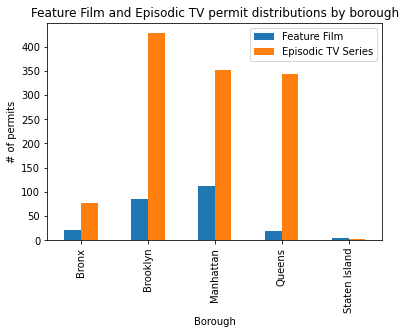

In [7]:
# make the bar chart
both_borough_counts.plot(kind = "bar")
plt.title("Feature Film and Episodic TV permit distributions by borough")
plt.xlabel("Borough")
plt.ylabel("# of permits")
plt.legend(["Feature Film","Episodic TV Series"])

1. How do the two bar charts compare?  What things are similar and what things are different?
2. To make it easier to compare the two distributions, normalize the counts (so that they are probabilities or proportions) by adding the parameter `normalize = True` to `value_counts()`.  Do you notice anything new differences between the two distributions?

Write your answers below.

1. There are many more permits for episodic television series than for feature films, although the increase in permits is mainly in Brooklyn, Manhattan, and Queens.
2. See below for the new bar chart.  We can see from it that the proportions of episodic televition series and feature films is approximately the same in the Bronx, Brooklyn, and Staten Island.  A higher proportion of feature films are shot in Manhattan, while a higher proportion of episodic television series are shot in Queens.

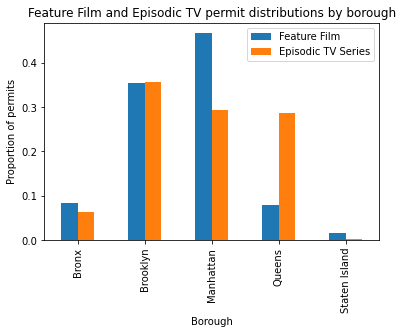

In [8]:
# get the normalized borough counts for both the feature film and episodic tv permits
norm_feature_borough_counts = feature_films["Borough"].value_counts(normalize = True)
norm_episodic_tv_borough_counts = episodic_tv["Borough"].value_counts(normalize = True)

# combine the counts into a dataframe
norm_both_borough_counts = pd.DataFrame({"feature":norm_feature_borough_counts, "tv": norm_episodic_tv_borough_counts})

# make the bar chart
norm_both_borough_counts.plot(kind = "bar")
plt.title("Feature Film and Episodic TV permit distributions by borough")
plt.xlabel("Borough")
plt.ylabel("Proportion of permits")
plt.legend(["Feature Film","Episodic TV Series"])